In [3]:
NB = 100
NP = 100

homophilic_tendency = {"m": 0, "M": 6, "n": NB}
pol_range = {"m": 0, "M": 1, "n": NP}

P = [0.1, 0.5, 0.9]


In [4]:
# visualization parameters

colors_X = ['#66c2a4', '#238b45','#00441b']  # fixed polarization
colors_Y = ['#67001f', '#e7298a', '#df65b0'] # fixed homophily
my_map = discretize_cmaps("hot_r",21)
my_map.set_bad(color='gray')
cmaps = [my_map]
contour_values = [[0.25, 0.5, 0.75]]
contour_colors = [['#000','#000','#000']]
final_params={
        'Lx': Lx,  # Figure width in inches
        'Ly': Ly,  # Figure height in inches
        'xticks': [0, 0.5, 1.0],
        'yticks': [0, 3, 6],
        'xlim': [0, 1],
        'ylim': [0, 6]
    }

In [5]:
temp = read_json("./parameters.json")
mus, taus, xis, PARAMS = temp["mus"], temp["taus"], temp["xis"], temp["PARAMS"]
rect_coords_M = [mus["pol"][0], mus["h"][0], mus["pol"][2]-mus["pol"][0], mus["h"][2]-mus["h"][0]]
rect_coords_T = [taus["pol"][0], taus["h"][0], taus["pol"][2]-taus["pol"][0], taus["h"][2]-taus["h"][0]]
rect_coords_V = [xis["pol"][0], xis["h"][0], xis["pol"][2]-xis["pol"][0], xis["h"][2]-xis["h"][0]]

In [5]:
print(mus)

{'mean': [0.76, 0.77, 0.78], 'pol': [0.26, 0.28, 0.3], 'h': [2.22, 2.57, 2.93]}


In [5]:
path_1_M = "figures/Fig_1/I(pol,hom)_M.pdf"
path_2_M = "figures/Fig_2/I(pol,hom,mean)_M.pdf"

NB_final = 100

pol_range = {"m": 0, "M": 1, "n": NB_final}
homophilic_tendency = {"m": 0, "M": 6, "n": NB_final}


PARAMS["fixed_mean"] = 0.5
RM_1 = sweep_two_parameters(
    model_module=SIRM,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=PARAMS,
    simulated_days=1000,
    population_size=5,
    batch_size=1000
)

PARAMS["fixed_mean"] = mus["mean"][1]
RM_2 = sweep_two_parameters(
    model_module=SIRM,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=PARAMS,
    simulated_days=1000,
    population_size=5,
    batch_size=1000
)
PARAMS["fixed_mean"] = 0.5


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [6]:
Lx_slim = 11
figsize_slim = [from_mm_to_in(18), from_mm_to_in(42)]
print(figsize_slim)


[0.7086614173228347, 1.6535433070866143]


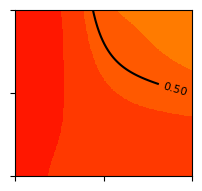

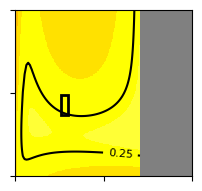

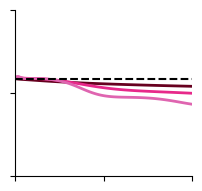

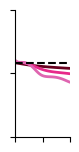

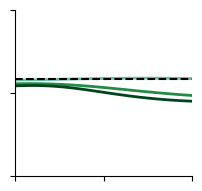

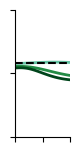

In [7]:
matrix_data, plot_params = analyze_matrix(RM_1, "infections")

# Create the plot (using unpacked parameters)
fig_R_M_1 = plot_matrix(
    data=matrix_data,
    **plot_params,  # Unpack all the extracted parameters
    cmap=cmaps[0],  # Using the first colormap
    figsize=(final_params.get('Lx', 10), final_params.get('Ly', 8)),
    contour_values = [0.25, 0.5, 0.75],
    xticks = [0,0.5,1],
    yticks = [0,3,6],
    save_path = path_1_M
)

matrix_data_M1, plot_params_M1 = analyze_matrix(RM_2, "infections")

fig_R_M_2 = plot_matrix(
    data=matrix_data_M1,
    **plot_params_M1,  # Unpack all the extracted parameters
    cmap=cmaps[0],  # Using the first colormap
    figsize=(final_params.get('Lx', 10), final_params.get('Ly', 8)),
    contour_values = [0.25, 0.5, 0.75],
    xticks = [0,0.5,1],
    yticks = [0,3,6],
    rect_coords = rect_coords_M,
    save_path = path_2_M
)
matrix_data_M2, plot_params_M2 = analyze_matrix(RM_1, "infections")

# Plot for fixed homophily values (horizontal slices)
fig1 = plot_slices(
    matrix_data=matrix_data_M2,
    plot_params=plot_params_M2,
    slice_values=[0, 3, 6],  # homophily values 
    slice_dimension="y",
    model_module=SIRM,        # For baseline calculation
    model_params=PARAMS,      # For baseline calculation
    colors=colors_Y,
    output_path="figures/Fig_1/I(pol)_M.pdf"
)

fig1 = plot_slices(
    matrix_data=matrix_data_M2,
    plot_params=plot_params_M2,
    slice_values=[0, 3, 6],  # homophily values 
    slice_dimension="y",
    model_module=SIRM,        # For baseline calculation
    model_params=PARAMS,      # For baseline calculation
    colors=colors_Y,
    figsize=figsize_slim,
    output_path="figures/Fig_1/I(pol)_M_slim.pdf"
)




# Plot for fixed polarization values (vertical slices)
fig2 = plot_slices(
    matrix_data=matrix_data,
    plot_params=plot_params,
    slice_values=[0.1, 0.5, 0.9],  # polarization values
    slice_dimension="x", 
    model_module=SIRM,
    model_params=PARAMS,
    colors=colors_X,
    output_path="figures/Fig_1/I(hom)_M.pdf"
)

fig2_slim = plot_slices(
    matrix_data=matrix_data,
    plot_params=plot_params,
    slice_values=[0.1, 0.5, 0.9],  # polarization values
    slice_dimension="x", 
    model_module=SIRM,
    model_params=PARAMS,
    colors=colors_X,
    figsize=figsize_slim,
    output_path="figures/Fig_1/I(hom)_M_slim.pdf"
)


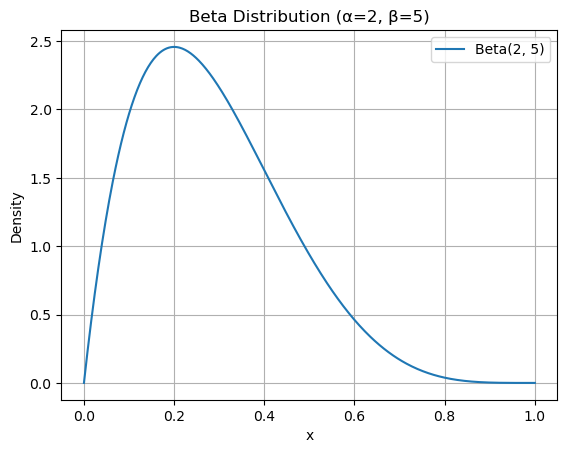

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters
alpha = 2
beta_param = 5

# Range of x
x = np.linspace(0, 1, 500)
y = beta.pdf(x, alpha, beta_param)

# Plot
plt.plot(x, y, label='Beta(2, 5)')
plt.title('Beta Distribution (α=2, β=5)')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()


In [8]:
path_1_T = "figures/Fig_1/I(pol,hom)_T.pdf"
path_2_T = "figures/Fig_2/I(pol,hom,mean)_T.pdf"

NB = 100
NP = 100

homophilic_tendency = {"m": 0, "M": 6, "n": NB}
pol_range = {"m": 0, "M": 1, "n": NP}


PARAMS["fixed_mean"] = 0.5
RT_1 = sweep_two_parameters(
    model_module=SIRT,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=PARAMS,
    simulated_days=1000,
    population_size=5,
    batch_size=1000
)

PARAMS["fixed_mean"] = taus["mean"][1]
RT_2 = sweep_two_parameters(
    model_module=SIRT,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=PARAMS,
    simulated_days=1000,
    population_size=5,
    batch_size=1000
)
PARAMS["fixed_mean"] = 0.5


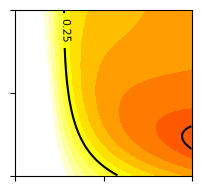

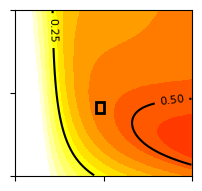

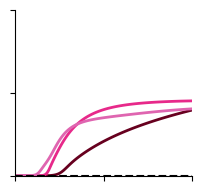

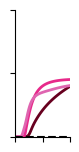

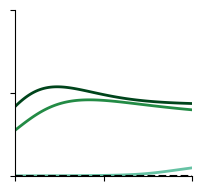

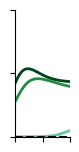

In [9]:
matrix_data_T1, plot_params_T1 = analyze_matrix(RT_1, "infections")

# Create the plot (using unpacked parameters)
fig_R_T_1 = plot_matrix(
    data=matrix_data_T1,
    **plot_params_T1,  # Unpack all the extracted parameters
    cmap=cmaps[0],  # Using the first colormap
    figsize=(final_params.get('Lx', 10), final_params.get('Ly', 8)),
    contour_values = [0.25, 0.5, 0.75],
    xticks = [0,0.5,1],
    yticks = [0,3,6],
    save_path = path_1_T
)

matrix_data_T2, plot_params_T2 = analyze_matrix(RT_2, "infections")

fig_R_T_2 = plot_matrix(
    data=matrix_data_T2,
    **plot_params_T2,  # Unpack all the extracted parameters
    cmap=cmaps[0],  # Using the first colormap
    figsize=(final_params.get('Lx', 10), final_params.get('Ly', 8)),
    contour_values = [0.25, 0.5, 0.75],
    xticks = [0,0.5,1],
    yticks = [0,3,6],
    save_path = path_2_T,
    rect_coords = rect_coords_T,
)


# Plot for fixed homophily values (horizontal slices)
fig1 = plot_slices(
    matrix_data=matrix_data_T1,
    plot_params=plot_params_T1,
    slice_values=[0, 3, 6],  # homophily values 
    slice_dimension="y",
    model_module=SIRT,        # For baseline calculation
    model_params=PARAMS,      # For baseline calculation
    colors=colors_Y,
    output_path="figures/Fig_1/I(pol)_T.pdf"
)

fig1 = plot_slices(
    matrix_data=matrix_data_T1,
    plot_params=plot_params_T1,
    slice_values=[0, 3, 6],  # homophily values 
    slice_dimension="y",
    model_module=SIRT,        # For baseline calculation
    model_params=PARAMS,      # For baseline calculation
    colors=colors_Y,
    figsize=figsize_slim,
    output_path="figures/Fig_1/I(pol)_T_slim.pdf"
)



# Plot for fixed polarization values (vertical slices)
fig2 = plot_slices(
    matrix_data=matrix_data_T2,
    plot_params=plot_params_T2,
    slice_values=[0.1, 0.5, 0.9],  # polarization values
    slice_dimension="x", 
    model_module=SIRT,
    model_params=PARAMS,
    colors=colors_X,
    output_path="figures/Fig_1/I(hom)_T.pdf"
)

fig2 = plot_slices(
    matrix_data=matrix_data_T2,
    plot_params=plot_params_T2,
    slice_values=[0.1, 0.5, 0.9],  # polarization values
    slice_dimension="x", 
    model_module=SIRT,
    model_params=PARAMS,
    colors=colors_X,
    figsize=figsize_slim,
    output_path="figures/Fig_1/I(hom)_T_slim.pdf"
)

In [10]:
path_1_V = "figures/Fig_1/I(pol,hom)_V.pdf"
path_2_V = "figures/Fig_2/I(pol,hom,mean)_V.pdf"

NB = 100
NP = 100

homophilic_tendency = {"m": 0, "M": 6, "n": NB}
pol_range = {"m": 0, "M": 1, "n": NP}


PARAMS["fixed_mean"] = 0.5
RV_1 = sweep_two_parameters(
    model_module=SIRV,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=PARAMS,
    simulated_days=1000,
    population_size=5,
    batch_size=1000
)

PARAMS["fixed_mean"] = xis["mean"][1]
RV_2 = sweep_two_parameters(
    model_module=SIRV,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=PARAMS,
    simulated_days=1000,
    population_size=5,
    batch_size=1000
)
PARAMS["fixed_mean"] = 0.5

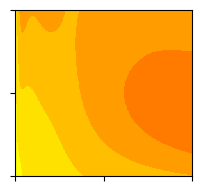

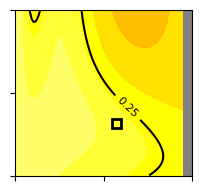

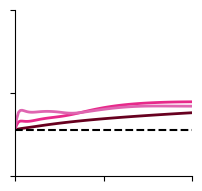

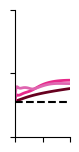

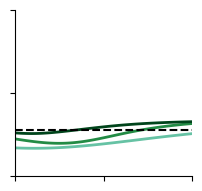

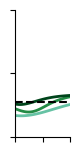

In [11]:
matrix_data_V1, plot_params_V1 = analyze_matrix(RV_1, "infections")

# Create the plot (using unpacked parameters)
fig_R_V_1 = plot_matrix(
    data=matrix_data_V1,
    **plot_params_V1,  # Unpack all the extracted parameters
    cmap=cmaps[0],  # Using the first colormap
    figsize=(final_params.get('Lx', 10), final_params.get('Ly', 8)),
    contour_values = [0.25, 0.5, 0.75],
    xticks = [0,0.5,1],
    yticks = [0,3,6],
    save_path = path_1_V
)

matrix_data_V2, plot_params_V2 = analyze_matrix(RV_2, "infections")

fig_R_V_2 = plot_matrix(
    data=matrix_data_V2,
    **plot_params_V2,  # Unpack all the extracted parameters
    cmap=cmaps[0],  # Using the first colormap
    figsize=(final_params.get('Lx', 10), final_params.get('Ly', 8)),
    contour_values = [0.25, 0.5, 0.75],
    xticks = [0,0.5,1],
    yticks = [0,3,6],
    save_path = path_2_V,
    rect_coords = rect_coords_V,
)


# Plot for fixed homophily values (horizontal slices)
fig1 = plot_slices(
    matrix_data=matrix_data_V1,
    plot_params=plot_params_V1,
    slice_values=[0, 3, 6],  # homophily values 
    slice_dimension="y",
    model_module=SIRV,        # For baseline calculation
    model_params=PARAMS,      # For baseline calculation
    colors=colors_Y,
    output_path="figures/Fig_1/I(pol)_V.pdf"
)

fig1 = plot_slices(
    matrix_data=matrix_data_V1,
    plot_params=plot_params_V1,
    slice_values=[0, 3, 6],  # homophily values 
    slice_dimension="y",
    model_module=SIRV,        # For baseline calculation
    model_params=PARAMS,      # For baseline calculation
    colors=colors_Y,
    figsize=figsize_slim,
    output_path="figures/Fig_1/I(pol)_V_slim.pdf"
)

# Plot for fixed polarization values (vertical slices)
fig2 = plot_slices(
    matrix_data=matrix_data_V2,
    plot_params=plot_params_V2,
    slice_values=[0.1, 0.5, 0.9],  # polarization values
    slice_dimension="x", 
    model_module=SIRV,
    model_params=PARAMS,
    colors=colors_X,
    output_path="figures/Fig_1/I(hom)_V.pdf"
)
fig2 = plot_slices(
    matrix_data=matrix_data_V2,
    plot_params=plot_params_V2,
    slice_values=[0.1, 0.5, 0.9],  # polarization values
    slice_dimension="x", 
    model_module=SIRV,
    model_params=PARAMS,
    colors=colors_X,
    figsize=figsize_slim,
    output_path="figures/Fig_1/I(hom)_V_slim.pdf"
)

In [12]:
P_min_M, P_max_M = find_hpol_minmax(SIRM, mus, PARAMS)
P_min_T, P_max_T = find_hpol_minmax(SIRT, taus, PARAMS)
P_min_V, P_max_V = find_hpol_minmax(SIRV, xis, PARAMS)

Minimum R+I value: 0.2480
   at polarization = 0.2605, homophily = 2.2289
Maximum R+I value: 0.2686
   at polarization = 0.2995, homophily = 2.9211
Minimum R+I value: 0.4439
   at polarization = 0.4605, homophily = 2.2751
Maximum R+I value: 0.4602
   at polarization = 0.4995, homophily = 2.5006
Minimum R+I value: 0.2099
   at polarization = 0.5506, homophily = 1.7244
Maximum R+I value: 0.2282
   at polarization = 0.5994, homophily = 2.0656


Percentage increase in infections for M model: -30.74%


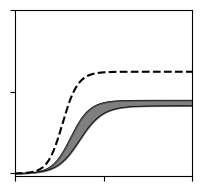

In [13]:
N_days = 1001
days = np.arange(0, N_days+1, 1)

MINS_M, MAXS_M, BASES_M, OG_M = calc_minmax_trajectories(SIRM, P_min_M, P_max_M, mus["mean"][1], PARAMS, simulated_days = N_days)
fig_comparison_M = plot_double_comparison(days, MINS_M, MAXS_M, BASES_M, OG_M, "figures/Fig_2/I(pol,hom)_M.pdf", Lx, Ly)

avg_predicted = (MINS_M[0][-1] + MINS_M[1][-1] + MAXS_M[0][-1] + MAXS_M[1][-1]) / 4

avg_base = (BASES_M[0][-1] + BASES_M[1][-1]) / 2

perc_increase = ((avg_predicted - avg_base) / avg_base) * 100
print(f"Percentage increase in infections for M model: {perc_increase:.2f}%")

increase in infections for T model: x 685.10


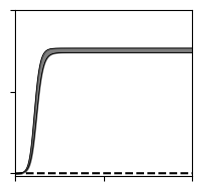

In [14]:
MINS_T, MAXS_T, BASES_T,OG_T = calc_minmax_trajectories(SIRT, P_min_T, P_max_T, taus["mean"][1], PARAMS, simulated_days = N_days)
fig_comparison_T = plot_double_comparison(days, MINS_T, MAXS_T, BASES_T, OG_T, "figures/Fig_2/I(pol,hom)_T.pdf", Lx, Ly)

avg_predicted = (MINS_T[0][-1] + MINS_T[1][-1] + MAXS_T[0][-1] + MAXS_T[1][-1]) / 4

avg_base = (BASES_T[0][-1] + BASES_T[1][-1]) / 2

perc_increase = ((avg_predicted - avg_base) / avg_base)
print(f"increase in infections for T model: x {perc_increase:.2f}")

Percentage increase in infections for V model: 123.62%


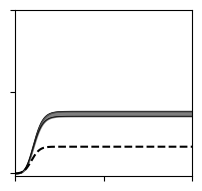

In [15]:
MINS_V, MAXS_V, BASES_V, OG_V = calc_minmax_trajectories(SIRV, P_min_V, P_max_V, xis["mean"][1], PARAMS, simulated_days = N_days)
fig_comparison_V = plot_double_comparison(days, MINS_V, MAXS_V, BASES_V, OG_V, "figures/Fig_2/I(pol,hom)_V.pdf", Lx, Ly)

avg_predicted = (MINS_V[0][-1] + MINS_V[1][-1] + MAXS_V[0][-1] + MAXS_V[1][-1]) / 4

avg_base = (BASES_V[0][-1] + BASES_V[1][-1]) / 2

perc_increase = ((avg_predicted - avg_base) / avg_base) * 100
print(f"Percentage increase in infections for V model: {perc_increase:.2f}%")

In [16]:
def calc_simple_trajectories(model, PARAMS, simulated_days=1000):

    S0_0 , I0_0, R0_0, *_ = run_single_simulation(0.0001, 0, 0.5, PARAMS, model, simulated_days=simulated_days)
    S0_1 , I0_1, R0_1, *_ = run_single_simulation(0.5, 0, 0.5, PARAMS, model, simulated_days=simulated_days)
    S0_2 , I0_2, R0_2, *_ = run_single_simulation(0.9999, 0, 0.5, PARAMS, model, simulated_days=simulated_days)
    return I0_0, I0_1, I0_2


In [17]:
R0_0, R0_1, R0_2 = calc_simple_trajectories(SIRM, PARAMS)


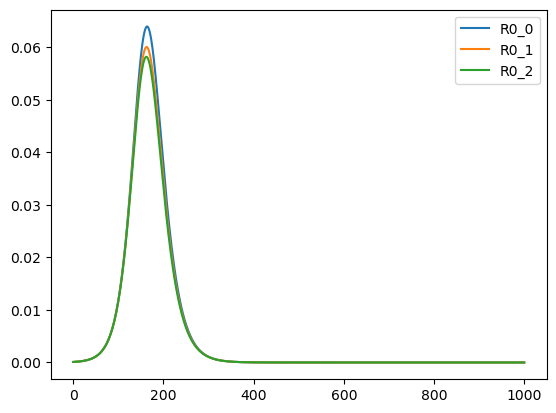

In [18]:
plt.plot(R0_0, label="R0_0")
plt.plot(R0_1, label="R0_1")
plt.plot(R0_2, label="R0_2")
plt.legend()
plt.show()



(0.0, 300.0)

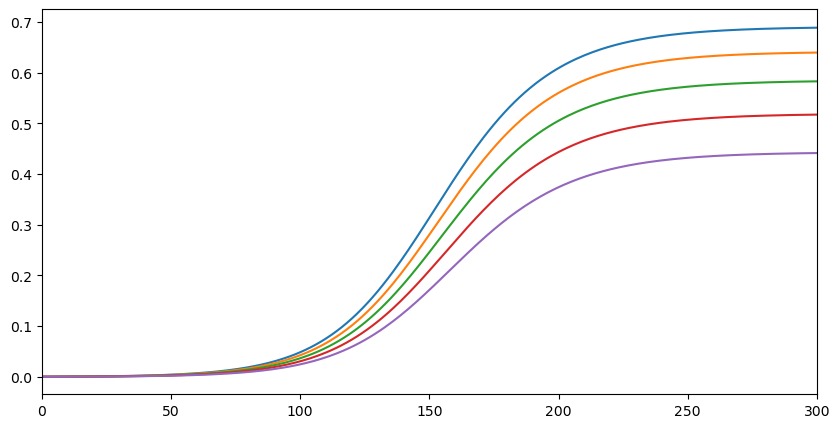

In [52]:
IR, time_points = get_compartment_temporal_data(
    polarization=0.02,
    homophilic_tendency=0,
    fixed_mean=0.5,
    PARAMS=PARAMS,
    model=SIRM,
    population_size=5,
    simulated_days = 1000
)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(IR[:,0])
ax.plot(IR[:,1])
ax.plot(IR[:,2])
ax.plot(IR[:,3])
ax.plot(IR[:,4])

ax.set_xlim(0,300)

In [111]:
def four_trajectories(model, PARAMS, simulated_days=1000):
    
    pols = np.array([0.2, 0.8])
    homs = np.array([0, 6])
    mean = 0.5



    RES = np.zeros((len(pols), len(homs), simulated_days+1))

    for i, pol in enumerate(pols):
        for j, hom in enumerate(homs):
            if model == SIRV:
                S, I, R, V, time_points = get_compartment_temporal_data(
                    polarization=pol,
                    homophilic_tendency=hom,
                    fixed_mean=mean,
                    PARAMS=PARAMS,
                    model=model,
                    population_size=5,
                    simulated_days = simulated_days
                )
                RES[i, j, :] = np.sum(I, axis=1)
            else:
                S, I, R, time_points = get_compartment_temporal_data(
                    polarization=pol,
                    homophilic_tendency=hom,
                    fixed_mean=mean,
                    PARAMS=PARAMS,
                    model=model,
                    population_size=5,
                    simulated_days = simulated_days
                )
                RES[i, j, :] = np.sum(I, axis=1)
    
    return RES


(0.0, 1.0)

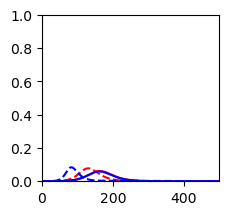

In [112]:
model = SIRM

RES = four_trajectories(model, PARAMS, simulated_days=1000)

colors = ["red", "blue"]
styles = ["-", "--"]

fig, ax = plt.subplots(figsize=(Lx, Ly))
for i in range(2):  # pols
    for j in range(2):  # homs
        ax.plot(RES[i, j, :], color=colors[i], linestyle=styles[j])

ax.set_xlim(0,500)
ax.set_ylim(0,1)

(0.0, 500.0)

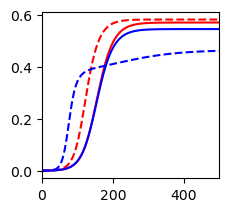

In [99]:
model = SIRM

RES = four_trajectories(model, PARAMS, simulated_days=1000)

colors = ["red", "blue"]
styles = ["-", "--"]

fig, ax = plt.subplots(figsize=(Lx, Ly))
for i in range(2):  # pols
    for j in range(2):  # homs
        ax.plot(RES[i, j, :], color=colors[i], linestyle=styles[j])

ax.set_xlim(0,500)

(0.0, 300.0)

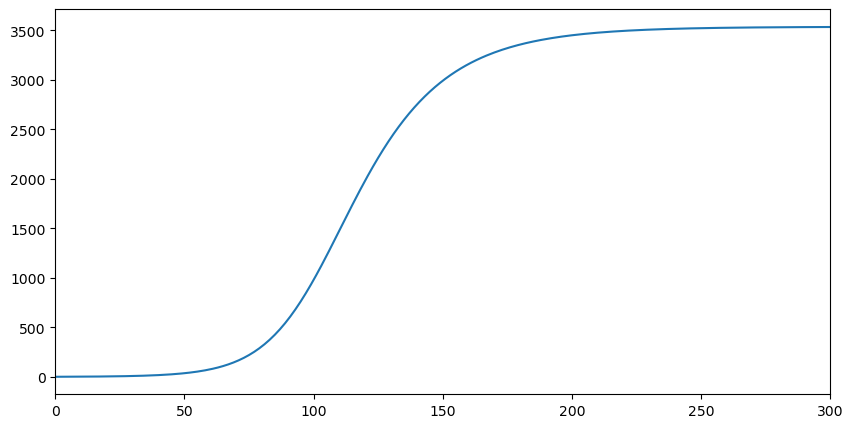

In [ ]:
IR0, time_points = get_compartment_temporal_data(
    polarization=0.001,
    homophilic_tendency=0,
    fixed_mean=0.5,
    PARAMS=PARAMS,
    model=SIRM,
    population_size=5,
    simulated_days = 1000
)
N_IR0 = normalize_IR(IR0,SIRM)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(N_IR0)
ax.set_xlim(0,300)

In [45]:
print(IR.shape)

(1001, 5)


(0.0, 300.0)

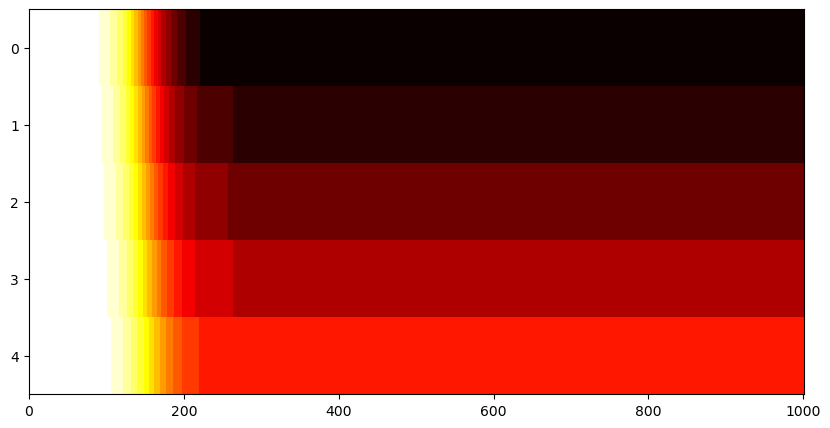

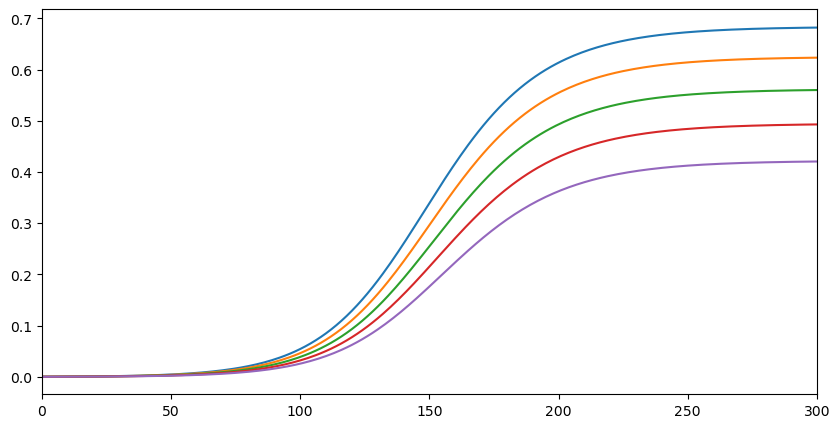

In [48]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(IR.T, cmap=my_map, aspect="auto", interpolation = "none")





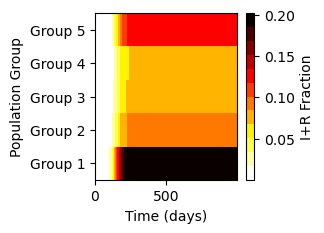

In [26]:
fig = plot_compartment_heatmap_temporal(
    IR=IR,
    time_points=time_points
)